In [1]:
from concurrent import futures
import logging
import math
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt

import grpc
import RemoteCam_pb2
import RemoteCam_pb2_grpc

PORT_CAM = 10509

### Put correct host address and test

request 0 -> response 0


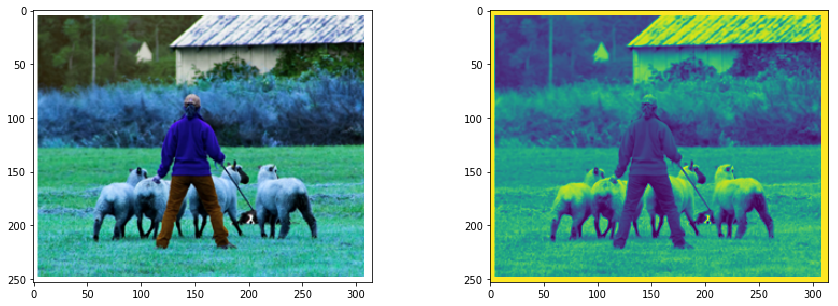

In [2]:
host = "localhost"
with grpc.insecure_channel('{}:{}'.format(host, PORT_CAM)) as channel:
    stub = RemoteCam_pb2_grpc.RemoteCamProtoStub(channel) 
    request_id = 0
    resp = stub.GetImage(RemoteCam_pb2.GetImageRequest(request_id=request_id))
    print("request {} -> response {}".format(request_id, resp.response_id))
    color = np.array(resp.color).reshape((resp.height, resp.width, 3))
    depth = np.array(resp.depth).reshape((resp.height, resp.width))
    
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(color)
plt.subplot(1,2,2)
plt.imshow(depth)